## **Social Media Analytics (SMA) SoSe24 -  Capstone Project**
### **The Analytical Part, Reporting & Recommendations**

#### `Name & Surname: Abdulkadir Arslan`

## **The Packages**

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import replicate

##### Analytical Part:

- In this part, I utilized the engineered data ('processed_comments.csv') to apply two different pre-trained sentiment analysis models (VADER and TextBlob) and conducted topic modeling using an LLM. I labeled the sentiments of 21 selected comments to evaluate the two sentiment models' performance and identify the more accurate one. Following model selection, visualizations were generated to interpret the sentiment analysis results. Subsequently, employing the `meta/meta-llama-3-70b-instruct` open-source LLM model, I identified the main topics discussed in both positive and negative comments separately. The analytical part is the actual part to create actionable insights.

**i.** *Loading the Engineered Data:*

I loaded the data set I engineered, from the `data_engineering_capstone.ipynb` file to perform the planned further analysis.

In [3]:
df = pd.read_csv('processed_comments.csv')
df.head()

,video_id,updated_at,comment_text
0,UZ5G0tVwBkI,2024-06-27T16:14:42Z,camera record without battery connect adapter
1,UZ5G0tVwBkI,2024-06-24T18:47:07Z,gopro get hero black update quality must
2,UZ5G0tVwBkI,2024-06-17T22:31:56Z,run crysis
3,UZ5G0tVwBkI,2024-06-13T03:51:07Z,build iphone camera
4,UZ5G0tVwBkI,2024-06-12T21:11:45Z,gps good idea know never waste money camera re...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      4200 non-null   object
 1   updated_at    4200 non-null   object
 2   comment_text  4186 non-null   object
dtypes: object(3)
memory usage: 98.6+ KB


The number of the total comments decreased from 4200 to 4186 because after the preprocessing step, some of the comments turned to the empty strings " " and these empty strings are automatically converted to NaN values when a DataFrame is saved in a CSV file. NaN values cause errors when performing sentıment analyses but I handled these errors in the coming steps.

**ii.** *Sentiment Labeling of the First 21 Comments to Evaluate the Performance of Models:* 

As you, Prof. Tillman, suggested I manually reviewed the first 21 comments in the dataset and categorized them as 'Positive', 'Negative', or 'Neutral'. I then compared these labels with the sentiments predicted by the VADER and TextBlob models. This comparison helped me assess which model more accurately performs sentiment analysis for my dataset.

In [5]:
trained_sentiments = ['Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative',
              'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
              'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
              'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative']

df_trained_sentiment = df.loc[:20].copy()

df_trained_sentiment['trained_sentiment'] = trained_sentiments

In [6]:
df_trained_sentiment[['comment_text', 'trained_sentiment']]

,comment_text,trained_sentiment
0,camera record without battery connect adapter,Neutral
1,gopro get hero black update quality must,Negative
2,run crysis,Neutral
3,build iphone camera,Neutral
4,gps good idea know never waste money camera re...,Negative
5,footage straight gopro correct grade,Neutral
6,name music,Neutral
7,receive first gopro black good source yt learn...,Positive
8,wonderful still use hero silver year work awes...,Positive
9,big fan gopro still use gopro hero perform wel...,Positive


**iii.** *Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner) Pre-trained Model:*

This step aims to perform sentiment analysis on the 'comment_text' column of a DataFrame (df) using the VADER sentiment analyzer. It initializes the analyzer and defines a function (analyze_sentiment_vader) to classify each comment as 'Positive', 'Negative', or 'Neutral' based on the compound sentiment score provided by VADER. The DataFrame (df_vader) is copied to ensure the original data is preserved, and missing values in the 'comment_text' column are handled by replacing them with empty strings. The sentiment analysis results are then added as a new column ('sentiment_label_vader') in the DataFrame. This process facilitates understanding of sentiment trends within the dataset using VADER's scoring mechanism.

In [7]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    
df_vader = df.copy()

if df_vader['comment_text'].isnull().sum() > 0:
    df_vader['comment_text'] = df_vader['comment_text'].fillna('')  # Fill NaN values with an empty string

df_vader['sentiment_label_vader'] = df_vader['comment_text'].apply(analyze_sentiment_vader)

df_vader.head(21)

,video_id,updated_at,comment_text,sentiment_label_vader
0,UZ5G0tVwBkI,2024-06-27T16:14:42Z,camera record without battery connect adapter,Neutral
1,UZ5G0tVwBkI,2024-06-24T18:47:07Z,gopro get hero black update quality must,Positive
2,UZ5G0tVwBkI,2024-06-17T22:31:56Z,run crysis,Neutral
3,UZ5G0tVwBkI,2024-06-13T03:51:07Z,build iphone camera,Neutral
4,UZ5G0tVwBkI,2024-06-12T21:11:45Z,gps good idea know never waste money camera re...,Positive
5,UZ5G0tVwBkI,2024-06-11T14:28:20Z,footage straight gopro correct grade,Positive
6,UZ5G0tVwBkI,2024-06-10T12:36:27Z,name music,Neutral
7,UZ5G0tVwBkI,2024-06-08T17:49:57Z,receive first gopro black good source yt learn...,Positive
8,UZ5G0tVwBkI,2024-06-07T15:18:15Z,wonderful still use hero silver year work awes...,Positive
9,UZ5G0tVwBkI,2024-06-04T19:28:29Z,big fan gopro still use gopro hero perform wel...,Positive


**iv.** *Sentiment Analysis with TextBlob Pre-trained Model:*

This step aims to conduct sentiment analysis on the 'comment_text' column of a DataFrame (df) using the TextBlob. It defines a function (analyze_sentiment) that analyzes the sentiment polarity of each comment and categorizes it as 'Positive', 'Neutral', or 'Negative'. The DataFrame (df_textblob) is copied to preserve the original data, and the sentiment analysis results are appended as a new column ('sentiment_label_textblob'). When printed, the DataFrame displays these sentiment labels for the first 21 comments, providing insights into the sentiment distribution across the dataset using TextBlob's sentiment analysis capabilities.

In [8]:
def analyze_sentiment(text):
    analysis = TextBlob(str(text)) 
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"
    
df_textblob = df.copy()

df_textblob['sentiment_label_textblob'] = df_textblob['comment_text'].apply(analyze_sentiment)

df_textblob.head(21)


,video_id,updated_at,comment_text,sentiment_label_textblob
0,UZ5G0tVwBkI,2024-06-27T16:14:42Z,camera record without battery connect adapter,Neutral
1,UZ5G0tVwBkI,2024-06-24T18:47:07Z,gopro get hero black update quality must,Negative
2,UZ5G0tVwBkI,2024-06-17T22:31:56Z,run crysis,Neutral
3,UZ5G0tVwBkI,2024-06-13T03:51:07Z,build iphone camera,Neutral
4,UZ5G0tVwBkI,2024-06-12T21:11:45Z,gps good idea know never waste money camera re...,Positive
5,UZ5G0tVwBkI,2024-06-11T14:28:20Z,footage straight gopro correct grade,Positive
6,UZ5G0tVwBkI,2024-06-10T12:36:27Z,name music,Neutral
7,UZ5G0tVwBkI,2024-06-08T17:49:57Z,receive first gopro black good source yt learn...,Positive
8,UZ5G0tVwBkI,2024-06-07T15:18:15Z,wonderful still use hero silver year work awes...,Positive
9,UZ5G0tVwBkI,2024-06-04T19:28:29Z,big fan gopro still use gopro hero perform wel...,Neutral


**v.** *Comparing Sentiment Analysis Accuracy of VADER and TextBlob Models on Subset Data:*

This step aims to evaluate the accuracy of sentiment analysis models (VADER and TextBlob) on a subset of data containing the first 21 comments. It defines a function (calculate_accuracy) to compute accuracy scores by comparing predicted sentiment labels from each model with true sentiment labels stored in df_trained_sentiment['trained_sentiment']. The subsetted DataFrames (df_vader_subset and df_textblob_subset) contain the sentiment labels predicted by VADER and TextBlob for the first 21 comments, respectively. The accuracy scores are calculated using scikit-learn's accuracy_score function and then printed to assess how well each model performs in predicting sentiment compared to the ground truth. This analysis helps in determining which sentiment analysis model, between VADER and TextBlob, provides more accurate results for the given dataset.

In [9]:
def calculate_accuracy(predicted_labels, true_labels):
    return accuracy_score(predicted_labels, true_labels)

df_vader_subset = df_vader.head(21)
df_textblob_subset = df_textblob.head(21)

accuracy_vader = calculate_accuracy(df_vader_subset['sentiment_label_vader'], df_trained_sentiment['trained_sentiment'])

accuracy_textblob = calculate_accuracy(df_textblob_subset['sentiment_label_textblob'], df_trained_sentiment['trained_sentiment'])

print(f"Accuracy of VADER: {accuracy_vader:.2f}")
print(f"Accuracy of TextBlob: {accuracy_textblob:.2f}")


Accuracy of VADER: 0.62
Accuracy of TextBlob: 0.71


TextBlob misclassified 6 out of 21 comments differently from the true sentiment labels, whereas VADER misclassified 8. Therefore, TextBlob achieved a higher accuracy of 71% compared to VADER's 62%. Because 71% accuracy is applicable to social media analytics, I continued with TextBlob for further analysis.

**vi.** *Visualizing Sentiment Distribution Across Different Videos Using TextBlob Analysis:*

This step visualizes sentiment distribution across videos' comments in DataFrame df_textblob. It groups data by 'video_id' and 'sentiment_label_textblob', counts sentiment occurrences per video, calculates percentage per sentiment category relative to total comments, and plots a bar chart. Each bar represents a video segmented into Positive, Neutral, and Negative sentiments with percentage labels. This aids in understanding sentiment variation among videos' comments, offering insights into current users and the potential customers' reactions and perceptions about the product.

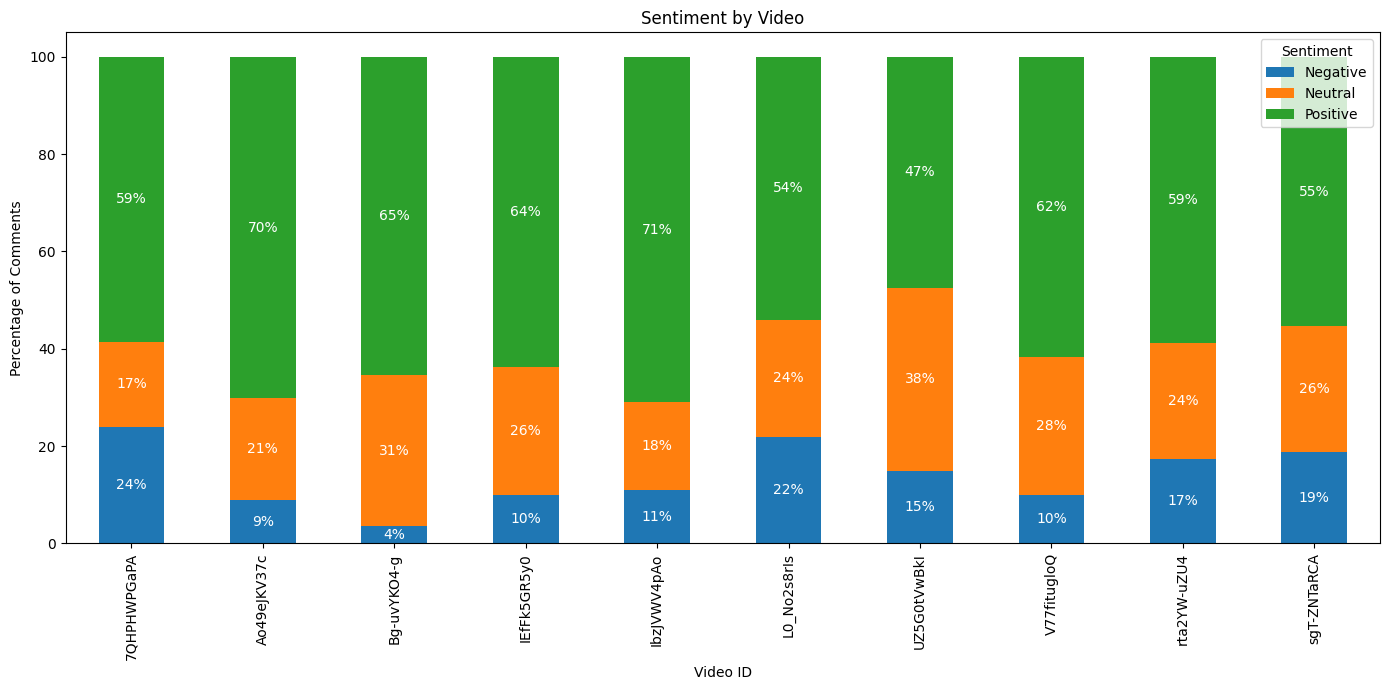

In [10]:
sentiment_by_video = df_textblob.groupby(['video_id', 'sentiment_label_textblob']).size().unstack(fill_value=0)

sentiment_by_video_percentage = sentiment_by_video.div(sentiment_by_video.sum(axis=1), axis=0) * 100

ax = sentiment_by_video_percentage.plot(kind='bar', stacked=True, figsize=(14, 7))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.title('Sentiment by Video')
plt.xlabel('Video ID')
plt.ylabel('Percentage of Comments')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

The visualization of sentiment distribution across different videos' comments provides valuable insights into content performance and audience engagement. Positive sentiments indicate videos that resonate well with viewers, suggesting strong candidates for marketing campaigns and collaborations with influential YouTubers. Conversely, negative sentiments pinpoint areas where content should be investigated deeply and specify potential reputational risks. This holistic understanding helps optimize marketing strategies by leveraging positive sentiments and addressing concerns raised by negative feedback, fostering a more balanced and effective approach to audience interaction and content promotion.

**vii.** *Visualizing the General Sentiment Distribution about the Product and Brand using TextBlob Sentiment Analysis*

This step aims to analyze sentiment distribution in comments about the product using TextBlob sentiment analysis. First, it calculates the counts and percentages of positive, neutral, and negative sentiments within the DataFrame df_textblob. It then visualizes these findings in two plots: a pie chart displaying the percentage breakdown of sentiments (positive, neutral, negative) related to the brand, and a bar chart showing the absolute count of each sentiment category. These visualizations help understand how customers perceive the product based on their comments, highlighting dominant sentiments and providing insights for targeted marketing strategies and product improvements.

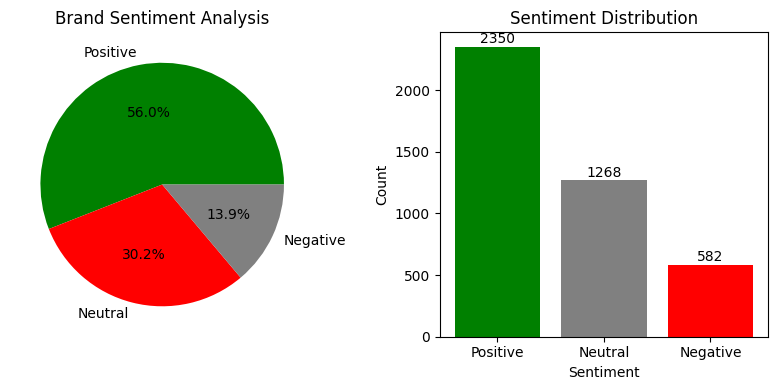

In [32]:
sentiment_counts = df_textblob['sentiment_label_textblob'].value_counts()

brand_sentiment = df_textblob['sentiment_label_textblob'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].pie(brand_sentiment, labels=brand_sentiment.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
axs[0].set_title('Brand Sentiment Analysis')
axs[0].set_ylabel('')

bars = axs[1].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
axs[1].set_title('Sentiment Distribution')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

- The high percentage and count of positive comments indicate strong customer satisfaction and positive reception of the product. This is a good indicator for the brand, suggesting that the product meets or exceeds user expectations.
-  Despite the positive feedback, the presence of 582 negative comments highlights areas where the product may not be meeting customer needs or expectations. Analyzing these comments in detail can provide insights into specific issues that need to be addressed.
- The significant proportion of neutral comments suggests that while many users are satisfied, there is room for enhancing the product to convert neutral users into positive advocates.
- The overall positive sentiment (56%) can be leveraged in marketing campaigns to highlight customer satisfaction. However, addressing the concerns found in the negative comments will be crucial for improving overall customer perception and reducing the percentage of negative feedback.

**viii.** *Visualizing Temporal Sentiment Trends in Current Users & Potential Customers' Feedback*

This step visualizes the sentiment trends over time by processing comment data from a DataFrame (df_textblob). It first converts the 'updated_at' column to a datetime format and extracts the month. It then groups the comments by month and sentiment label, calculates the percentage of each sentiment per month, and applies exponential smoothing to these percentages with an alpha of 0.3. The smoothed sentiment percentages are plotted over time, with separate lines for Positive, Negative, and Neutral sentiments. Additionally, monthly averages are annotated on the plot. This visualization helps in understanding how the sentiment distribution towards the product changes over time, providing insights into temporal trends in customer feedback.

C:\Users\hp\AppData\Local\Temp\ipykernel_10512\4256310112.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_textblob_date['date'] = df_textblob_date['updated_at'].dt.to_period('M')  # Group by month


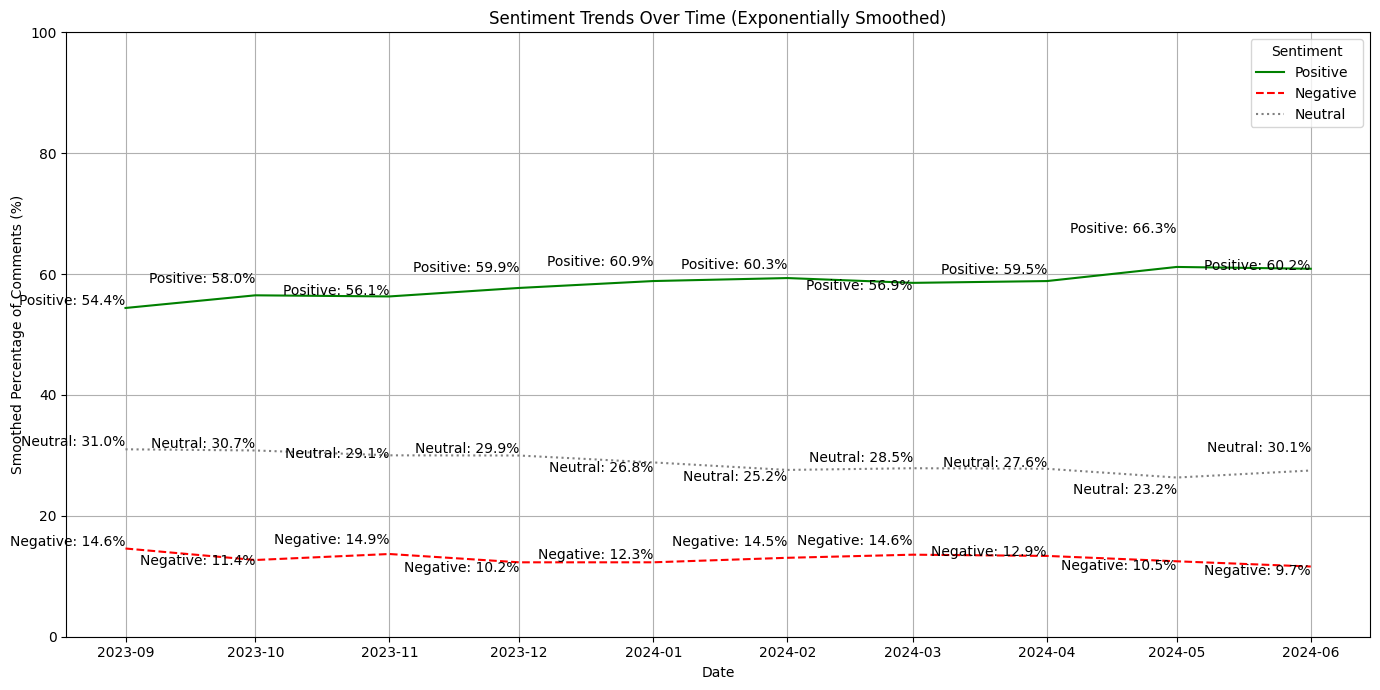

In [12]:
df_textblob_date = df_textblob.copy()

df_textblob_date['updated_at'] = pd.to_datetime(df_textblob_date['updated_at'])

df_textblob_date['date'] = df_textblob_date['updated_at'].dt.to_period('M')  # Group by month

sentiment_counts = df_textblob_date.groupby(['date', 'sentiment_label_textblob']).size().unstack(fill_value=0)

sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

monthly_averages = sentiment_percentages.groupby(sentiment_percentages.index.to_timestamp()).mean()

# Calculate exponential smoothing with alpha = 0.3 (adjust as needed)
alpha = 0.3
sentiment_percentages_smoothed = sentiment_percentages.ewm(alpha=alpha).mean()

# Convert index to Timestamp
sentiment_percentages_smoothed.index = sentiment_percentages_smoothed.index.to_timestamp()

plt.figure(figsize=(14, 7))

plt.plot(sentiment_percentages_smoothed.index, sentiment_percentages_smoothed['Positive'], label='Positive', color='green', linestyle='-')
plt.plot(sentiment_percentages_smoothed.index, sentiment_percentages_smoothed['Negative'], label='Negative', color='red', linestyle='--')
plt.plot(sentiment_percentages_smoothed.index, sentiment_percentages_smoothed['Neutral'], label='Neutral', color='gray', linestyle=':')

for col in monthly_averages.columns:
    for date, avg in monthly_averages[col].items():
        plt.text(date, avg, f'{col}: {avg:.1f}%', ha='right', va='bottom')

plt.title('Sentiment Trends Over Time (Exponentially Smoothed)')
plt.xlabel('Date')
plt.ylabel('Smoothed Percentage of Comments (%)')
plt.ylim(0, 100) 
plt.legend(title='Sentiment', loc='upper right')
plt.grid(True) 
plt.tight_layout() 
plt.show()

- The overall sentiment towards the product is predominantly positive, with an increasing trend in positive comments and a decreasing trend in neutral and negative comments.
- The peak in positive sentiment in April 2024 could indicate a successful event, marketing campaign, or product update that positively impacted user perceptions.
- The slight increase in neutral comments towards June 2024 might suggest a phase where new users are sharing their initial, undecided reactions.
- The relatively stable and low negative sentiment indicates ongoing user satisfaction and effective product management.
- These trends can help guide marketing strategies, product improvements, and customer engagement efforts by highlighting periods of success and areas needing attention.

**ix.** *Key Theme Identification Using 'Meta-LLama-3-70B-Instruct LLM'*

Meta-LLama-3-70B-Instruct is a large language model developed by Meta, part of the LLaMA 3 family. This collection includes both 8 billion and 70 billion parameter models that are pretrained and instruction-tuned to excel in generative text tasks, particularly optimized for dialogue use cases. The model outperforms many open-source chat models on common industry benchmarks, making it highly effective for natural language understanding and generation.

The reason why I chose it is because I think that the capabilities such as generative text, dialogue optimization, context handling, and instruction tuning collectively ensure that the Meta-LLama-3-70B-Instruct model can efficiently analyze sentiment-labeled comments and specify the main topics or themes from both positive and negative feedback.

In this step, I employed the 'Meta-LLama-3-70B-Instruct LLM' from 'Replicate' to identify common themes in positive and negative comments about GoPro Hero12 camera. The process involves separating comments by sentiment, sampling 500 comments each from positive and negative categories, and then using a function to generate topics based on these comments. The function prepares an input prompt that asks the model to identify main topics within the provided comments and runs the analysis using the Replicate API. This approach leverages the advanced natural language understanding capabilities of Meta-LLama-3-70B-Instruct to extract meaningful themes from large volumes of text data.

I used the sample code from [Replicate's LLM model introction page](https://replicate.com/meta/meta-llama-3-70b-instruct) to employ the LLM model.

In [21]:
positive_comments = df_textblob.sample(500)[df_textblob['sentiment_label_textblob'] == 'Positive']['comment_text'].tolist()
negative_comments = df_textblob.sample(500)[df_textblob['sentiment_label_textblob'] == 'Negative']['comment_text'].tolist()

def generate_topics(comments, sentiment):
    input_text = f"Identify the main topics in these {sentiment} comments:\n\n" + "\n".join(comments)
    
    input = {
        "top_p": 0.9,
        "prompt": input_text,
        "min_tokens": 0,
        "temperature": 0.6,
        "prompt_template": "system\n\nYou are a helpful assistantuser\n\n{prompt}assistant\n\n",
        "presence_penalty": 1.15
    }

    output = replicate.run("meta/meta-llama-3-70b-instruct", input=input)
    return ''.join(output)

api_token = os.getenv('REPLICATE_API_TOKEN')

if api_token is None:
    raise ValueError("API token not found. Make sure the REPLICATE_API_TOKEN environment variable is set.")

client = replicate.Client(api_token)

positive_topics = generate_topics(positive_comments, "positive")
negative_topics = generate_topics(negative_comments, "negative")

print("Topics in Positive Comments:")
print(positive_topics)

print("\nTopics in Negative Comments:")
print(negative_topics)

C:\Users\hp\AppData\Local\Temp\ipykernel_10512\863656942.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_comments = df_textblob.sample(500)[df_textblob['sentiment_label_textblob'] == 'Positive']['comment_text'].tolist()
C:\Users\hp\AppData\Local\Temp\ipykernel_10512\863656942.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_comments = df_textblob.sample(500)[df_textblob['sentiment_label_textblob'] == 'Negative']['comment_text'].tolist()


Topics in Positive Comments:
The main topics in these positive comments are:

1. **Gopro camera features and performance**: Many comments praise the camera's image quality, stabilization, video resolution, low light performance, and battery life.
2. **Comparison with other cameras**: Some comments compare the Gopro with other action cameras like DJI Osmo Action, iPhone, and other smartphones, highlighting its advantages and disadvantages.
3. **Upgrades and new features**: Users express excitement about new features, such as improved battery life, better low light performance, and new accessories like the Max Lens Mod.
4. **User experience and tutorials**: Several comments appreciate tutorials, reviews, and tips on how to use the Gopro camera, including settings, mounts, and editing software.
5. **Sports and outdoor activities**: Many comments mention using the Gopro for various sports and outdoor activities, such as surfing, skiing, biking, and motocross.
6. **Humor and entertainment**

First of all it was a good suggestion, from you Prof. Tillman, to use a large language model (LLM) for identifying key themes in positive and negative comments. The generated key themes with their explanations have been satisfactory upon manual investigation of the comments. However, providing sample sentences with their key themes for prompt engineering led the model to focus only on the provided themes. Therefore, I used the comments as the sole input to ensure a broader analysis.

I could not provide the whole comments to the prompt because of the input length limitation and I encountered the following error when I attempt to use approximately more than 500 comments;

`ModelError: E1002 PromptTooLong: Prompt length (18273) exceeds maximum input length (8096)`

In summary, the analysis reveals that while GoPro Hero12 camera is generally well-received for its performance and features, there are specific areas such as overheating, battery life, and customer service that need improvement. The positive comments highlight user satisfaction and the product’s versatility, particularly in sports and outdoor activities. On the other hand, the negative comments provide valuable insights into users' frustrations and areas where GoPro can focus on enhancing product quality and customer experience. This thematic analysis can guide GoPro in addressing user concerns and improving future product iterations.

**The Reporting (A very short summary from the evaluations of the results of the project):**

In this project, top-viewed YouTube videos related to "GoPro HERO12 English reviews" search were identified and analyzed, focusing on excluding shorts and non-specific content to the Hero 12. A selected list of video IDs for the top 10 videos was compiled based on significant engagement metrics such as views, likes, and comments, emphasizing videos with robust viewer interaction. Comments were extracted and processed from these top videos, resulting in a dataset of 4,200 English-language comments after preprocessing. Sentiment analysis was conducted using VADER and TextBlob models, with TextBlob selected for its higher accuracy (71%) in categorizing comments as positive, neutral, or negative. Visualizations illustrated sentiment distribution across videos and overall sentiment towards the GoPro Hero 12, revealing predominant positive sentiment (56%) indicative of high customer satisfaction. Temporal sentiment trends from April to June 2024 depicted an increasing positive sentiment trend and consistently low levels of negative sentiment. Key themes in comments were identified using the Meta-LLama-3-70B-Instruct LLM, highlighting positive aspects like performance and features (especially in sports) alongside areas for improvement such as overheating and battery life concerns.

**Recommendations:**

Marketing Strategy:

- Leveraging videos with high engagement for targeted marketing campaigns.
- Highlighting positive sentiment themes in promotional materials to increase customer satisfaction.

Product Development:

- Addressing concerns highlighted in negative comments such as overheating and battery life through product improvements.
- Focusing on enhancing features praised in positive comments (e.g., versatility) to maintain customer satisfaction.

Customer Engagement:

- Engaging with customers in comments sections to address concerns directly.
- Encouraging positive user-generated content by supporting influencers and satisfied customers.

Social Media Management:

- Monitoring and responding promptly to comments to maintain positive sentiment and address negative feedback effectively.
- Using sentiment analysis tools regularly to track changes in customer perceptions over time.

Future Research

- Conducting further sentiment analysis periodically to track ongoing changes in customer sentiment and identify emerging trends.
- Exploring additional social media platforms beyond YouTube for broader audience insights.